In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [52]:
import data_loader as loader
import network
import generate_mc_data as mc_data

In [3]:
training_data, validation_data, test_data = loader.load_data_wrapper('mnist.pkl.gz')
len(training_data), len(validation_data), len(test_data)

number of different labels for the output: 10


(50000, 10000, 10000)

In [4]:
len(training_data[0]) # image pixels, label

2

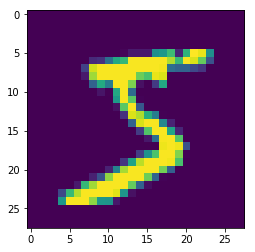

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [10]:
plt.imshow(training_data[0][0].reshape(28, 28))
plt.show()
training_data[0][1]

In [35]:
class Network(network.Network):
    def backprop(self, x, y):
        """Return a tuple ``(nabla_b, nabla_w)`` representing the
        gradient for the cost function C_x.  ``nabla_b`` and
        ``nabla_w`` are layer-by-layer lists of numpy arrays, similar
        to ``self.biases`` and ``self.weights``."""
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]

        # Feedforward
        a = []
        z = []
        
        # calculate weighted inputs z & activations a for each layer
        a.append(np.array(x))
        z.append(self.biases[0])
        for w, b in zip(self.weights, self.biases):
            z.append(np.dot(w, a[-1]) + b) # 0 -> L
            a.append(network.sigmoid(z[-1])) # 0 -> L
        
        delta = []
        delta.append(self.cost_derivative(a[-1], y) * network.sigmoid_prime(z[-1]))
        nabla_b[-1] = delta[0]
        nabla_w[-1] = np.dot(delta[0], a[-2].transpose())
        
        # backpropagate the delta from last hidden layer to first, calculate gradients
        for i, w in enumerate(self.weights[:0:-1], start=2): # L -> 1
            delta.append(np.dot(w.transpose(), delta[-1]) * network.sigmoid_prime(z[-i])) # L -> 0
            nabla_b[-i] = delta[-1] # 0 -> L
            nabla_w[-i] = np.dot(delta[-1], a[-(i+1)].transpose()) # 0 -> L

        return (nabla_b, nabla_w)

In [77]:
testNetwork0 = Network([784, 30, 10]) # layers: 784 inputs, 30 neurons hidden layer, 10 outputs
testNetwork0.SGD(training_data, epochs=15, mini_batch_size=10, eta=0.5, test_data=test_data)

Epoch  0:     7169 / 10000 = 71.7%
Epoch  1:     8806 / 10000 = 88.1%
Epoch  2:     8958 / 10000 = 89.6%
Epoch  3:     9076 / 10000 = 90.8%
Epoch  4:     9124 / 10000 = 91.2%
Epoch  5:     9164 / 10000 = 91.6%
Epoch  6:     9205 / 10000 = 92.0%
Epoch  7:     9232 / 10000 = 92.3%
Epoch  8:     9259 / 10000 = 92.6%
Epoch  9:     9264 / 10000 = 92.6%
Epoch  10:     9284 / 10000 = 92.8%
Epoch  11:     9293 / 10000 = 92.9%
Epoch  12:     9311 / 10000 = 93.1%
Epoch  13:     9324 / 10000 = 93.2%
Epoch  14:     9328 / 10000 = 93.3%


In [72]:
testNetwork1 = Network([784, 100, 10]) # 100 neurons
testNetwork1.SGD(training_data, epochs=15, mini_batch_size=10, eta=0.5, test_data=test_data)

Epoch  0:     5556 / 10000 = 55.6%
Epoch  1:     6397 / 10000 = 64.0%
Epoch  2:     6596 / 10000 = 66.0%
Epoch  3:     6668 / 10000 = 66.7%
Epoch  4:     6674 / 10000 = 66.7%
Epoch  5:     6710 / 10000 = 67.1%
Epoch  6:     6731 / 10000 = 67.3%
Epoch  7:     6755 / 10000 = 67.5%
Epoch  8:     6760 / 10000 = 67.6%
Epoch  9:     6771 / 10000 = 67.7%
Epoch  10:     6789 / 10000 = 67.9%
Epoch  11:     6789 / 10000 = 67.9%
Epoch  12:     6793 / 10000 = 67.9%
Epoch  13:     6802 / 10000 = 68.0%
Epoch  14:     6820 / 10000 = 68.2%


In [73]:
testNetwork2 = Network([784, 30, 30, 10]) # 60 neurons
testNetwork2.SGD(training_data, epochs=15, mini_batch_size=10, eta=0.5, test_data=test_data)

Epoch  0:     8251 / 10000 = 82.5%
Epoch  1:     8787 / 10000 = 87.9%
Epoch  2:     8986 / 10000 = 89.9%
Epoch  3:     9070 / 10000 = 90.7%
Epoch  4:     9114 / 10000 = 91.1%
Epoch  5:     9154 / 10000 = 91.5%
Epoch  6:     9201 / 10000 = 92.0%
Epoch  7:     9224 / 10000 = 92.2%
Epoch  8:     9258 / 10000 = 92.6%
Epoch  9:     9266 / 10000 = 92.7%
Epoch  10:     9286 / 10000 = 92.9%
Epoch  11:     9311 / 10000 = 93.1%
Epoch  12:     9309 / 10000 = 93.1%
Epoch  13:     9316 / 10000 = 93.2%
Epoch  14:     9310 / 10000 = 93.1%


In [74]:
testNetwork3 = Network([784, 20, 10, 10]) # 30 neurons
testNetwork3.SGD(training_data, epochs=15, mini_batch_size=10, eta=0.5, test_data=test_data)

Epoch  0:     7008 / 10000 = 70.1%
Epoch  1:     8442 / 10000 = 84.4%
Epoch  2:     8815 / 10000 = 88.2%
Epoch  3:     8938 / 10000 = 89.4%
Epoch  4:     8989 / 10000 = 89.9%
Epoch  5:     9047 / 10000 = 90.5%
Epoch  6:     9069 / 10000 = 90.7%
Epoch  7:     9100 / 10000 = 91.0%
Epoch  8:     9126 / 10000 = 91.3%
Epoch  9:     9133 / 10000 = 91.3%
Epoch  10:     9144 / 10000 = 91.4%
Epoch  11:     9169 / 10000 = 91.7%
Epoch  12:     9182 / 10000 = 91.8%
Epoch  13:     9171 / 10000 = 91.7%
Epoch  14:     9204 / 10000 = 92.0%


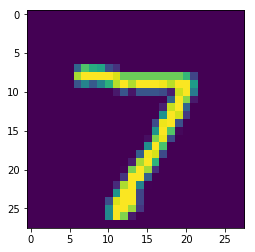

7


1

In [50]:
# test for specific digit
plt.imshow(test_data[0][0].reshape(28, 28))
plt.show()
print(test_data[0][1])
testNetwork0.evaluate([test_data[0]])

In [76]:
data = mc_data.generate_data() # T = 3, 2.3, 1.5
mc_data.save_data(data, filename="mcIsing.pkl.gz")

generate data for T= 3.000
generate data for T= 2.300
generate data for T= 1.500
save data to  mcIsing.pkl.gz


In [78]:
mc_training_data, mc_validation_data, mc_test_data = loader.load_data_wrapper('mcIsing.pkl.gz')
len(mc_training_data), len(mc_validation_data), len(mc_test_data)

number of different labels for the output: 3


(30000, 6000, 6000)

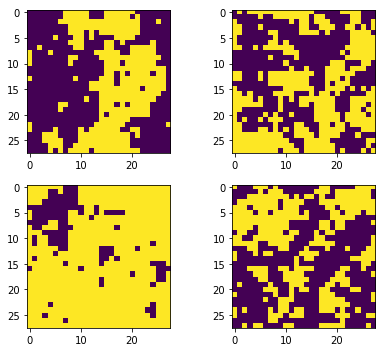

[[0.]
 [1.]
 [0.]]
[[1.]
 [0.]
 [0.]]
[[0.]
 [1.]
 [0.]]
[[1.]
 [0.]
 [0.]]


In [79]:
plt.figure(figsize=(6, 5), dpi=72)
plt.subplot(2, 2, 1)
plt.imshow(mc_training_data[0][0].reshape(28, 28))

plt.subplot(2, 2, 2)
plt.imshow(mc_training_data[1][0].reshape(28, 28))

plt.subplot(2, 2, 3)
plt.imshow(mc_training_data[2][0].reshape(28, 28))

plt.subplot(2, 2, 4)
plt.imshow(mc_training_data[3][0].reshape(28, 28))

plt.tight_layout() # subplot padding
plt.show()

for i in range(4):
    print(mc_training_data[i][1])

In [82]:
mcNetwork0 = Network([784, 30, 3]) # 30 neurons
mcNetwork0.SGD(mc_training_data, epochs=15, mini_batch_size=10, eta=0.5, test_data=mc_test_data)

Epoch  0:     3316 / 6000 = 55.3%
Epoch  1:     3480 / 6000 = 58.0%
Epoch  2:     3613 / 6000 = 60.2%
Epoch  3:     3486 / 6000 = 58.1%
Epoch  4:     3803 / 6000 = 63.4%
Epoch  5:     3644 / 6000 = 60.7%
Epoch  6:     3939 / 6000 = 65.7%
Epoch  7:     3923 / 6000 = 65.4%
Epoch  8:     4046 / 6000 = 67.4%
Epoch  9:     4078 / 6000 = 68.0%
Epoch  10:     4087 / 6000 = 68.1%
Epoch  11:     4035 / 6000 = 67.2%
Epoch  12:     4134 / 6000 = 68.9%
Epoch  13:     4071 / 6000 = 67.8%
Epoch  14:     4144 / 6000 = 69.1%


In [83]:
mcNetwork1 = Network([784, 20, 10, 3]) # 30 neurons
mcNetwork1.SGD(mc_training_data, epochs=15, mini_batch_size=10, eta=0.5, test_data=mc_test_data)

Epoch  0:     5297 / 6000 = 88.3%
Epoch  1:     5439 / 6000 = 90.7%
Epoch  2:     5304 / 6000 = 88.4%
Epoch  3:     5456 / 6000 = 90.9%
Epoch  4:     5525 / 6000 = 92.1%
Epoch  5:     5517 / 6000 = 92.0%
Epoch  6:     5479 / 6000 = 91.3%
Epoch  7:     5507 / 6000 = 91.8%
Epoch  8:     5540 / 6000 = 92.3%
Epoch  9:     5526 / 6000 = 92.1%
Epoch  10:     5500 / 6000 = 91.7%
Epoch  11:     5540 / 6000 = 92.3%
Epoch  12:     5541 / 6000 = 92.3%
Epoch  13:     5551 / 6000 = 92.5%
Epoch  14:     5541 / 6000 = 92.3%


In [84]:
mcNetwork2 = Network([784, 20, 10, 10, 3]) # 40 neurons
mcNetwork2.SGD(mc_training_data, epochs=15, mini_batch_size=10, eta=0.5, test_data=mc_test_data)

Epoch  0:     4610 / 6000 = 76.8%
Epoch  1:     5321 / 6000 = 88.7%
Epoch  2:     5361 / 6000 = 89.3%
Epoch  3:     5477 / 6000 = 91.3%
Epoch  4:     5503 / 6000 = 91.7%
Epoch  5:     5548 / 6000 = 92.5%
Epoch  6:     5544 / 6000 = 92.4%
Epoch  7:     5542 / 6000 = 92.4%
Epoch  8:     5533 / 6000 = 92.2%
Epoch  9:     5573 / 6000 = 92.9%
Epoch  10:     5530 / 6000 = 92.2%
Epoch  11:     5466 / 6000 = 91.1%
Epoch  12:     5457 / 6000 = 91.0%
Epoch  13:     5528 / 6000 = 92.1%
Epoch  14:     5518 / 6000 = 92.0%
